In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats.stats import pearsonr

In [2]:
path = %pwd
corrected_path = path.replace('\\','/')

In [3]:
data = pd.read_csv(corrected_path+'/data/happiness_2019.csv', index_col='Overall rank')
data.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
data.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

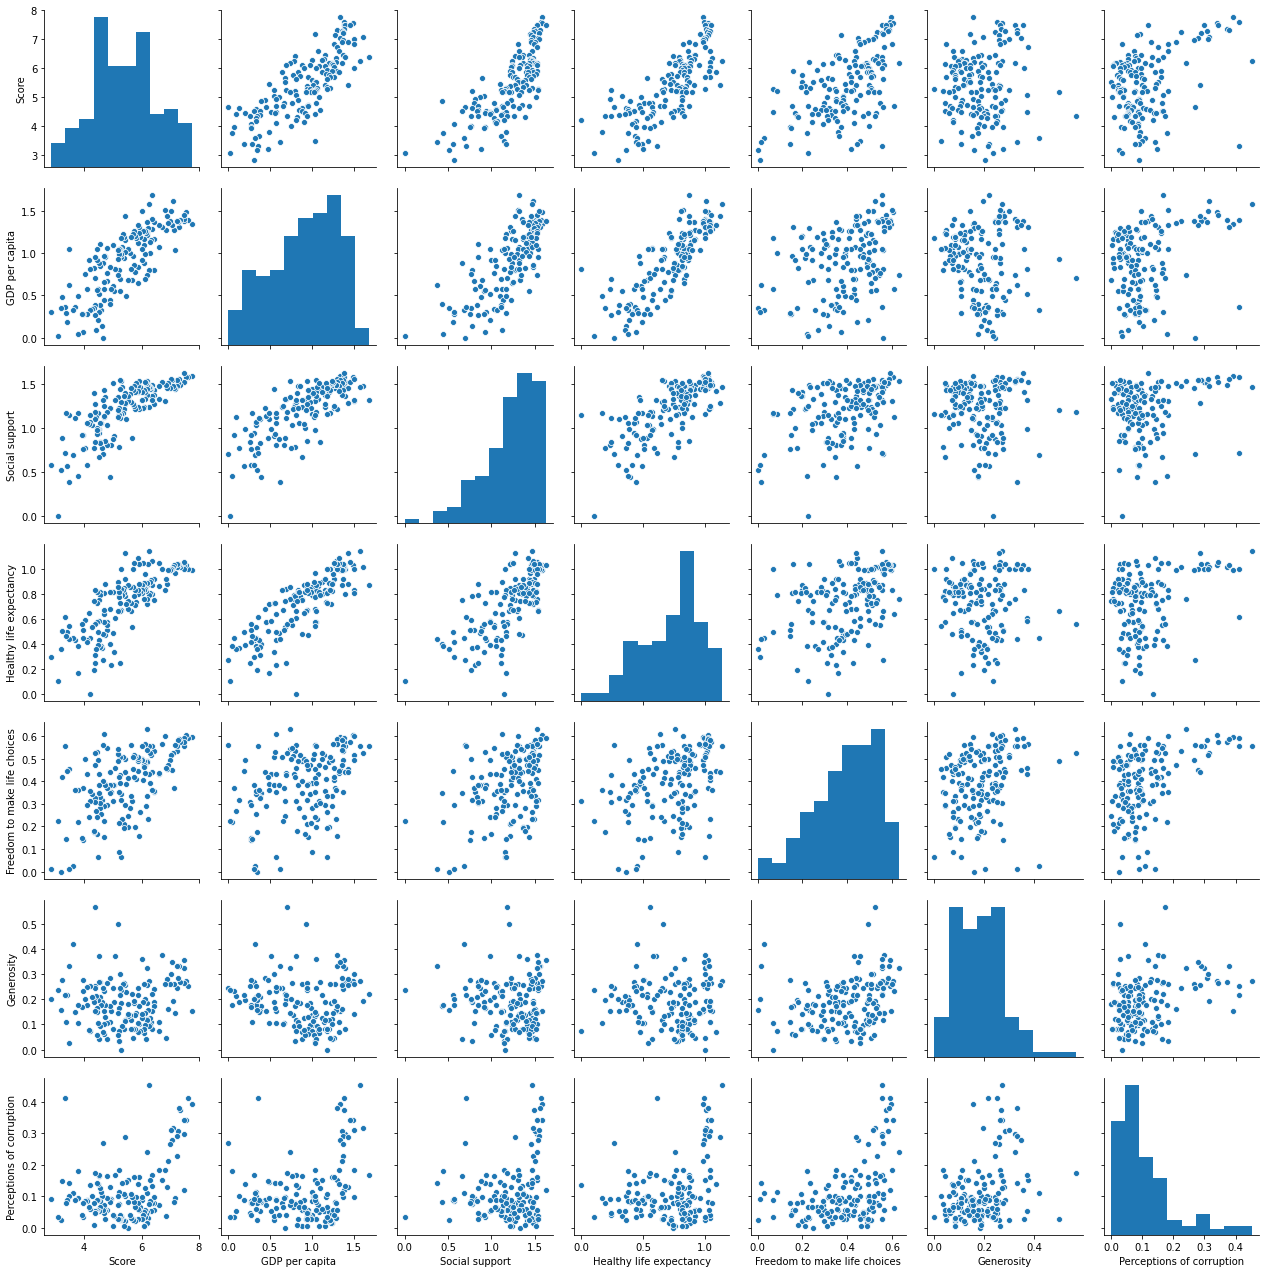

In [4]:
sb.pairplot(data)

In [5]:
R_value, p = pearsonr(data['Score'],data['GDP per capita'])
print('Pearson R coefficient for Score vs. GDP per capita: %0.2f' %(R_value))

Pearson R coefficient for Score vs. GDP per capita: 0.79


In [6]:
R_value, p = pearsonr(data['Score'],data['Healthy life expectancy'])
print('Pearson R coefficient for Score vs. Healthy life expectancy: %0.2f' %(R_value))

Pearson R coefficient for Score vs. Healthy life expectancy: 0.78


In [7]:
R_value, p = pearsonr(data['GDP per capita'],data['Healthy life expectancy'])
print('Pearson R coefficient for GDP per capita vs. Healthy life expectancy: %0.2f' %(R_value))

Pearson R coefficient for GDP per capita vs. Healthy life expectancy: 0.84


In [8]:
R_value, p = pearsonr(data['GDP per capita'],data['Freedom to make life choices'])
print('Pearson R coefficient for GDP per capita vs. Freedom to make life choices: %0.2f' %(R_value))

Pearson R coefficient for GDP per capita vs. Freedom to make life choices: 0.38


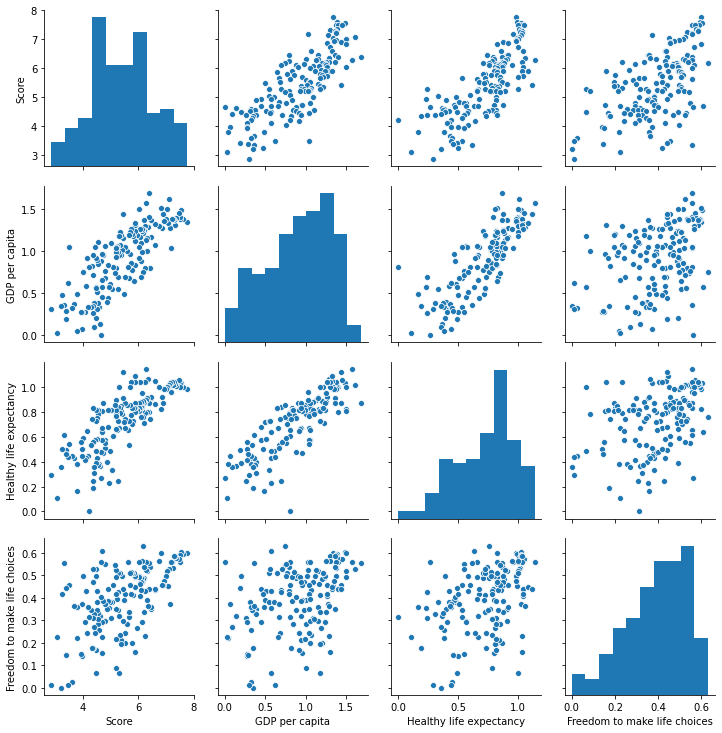

In [9]:
subset = data[['Score','GDP per capita','Healthy life expectancy','Freedom to make life choices']]
sb.pairplot(subset)

In [10]:
correlations = subset.corr()
correlations

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices
Score,1.000000,0.793883,0.779883,0.566742
GDP per capita,0.793883,1.000000,0.835462,0.379079
Healthy life expectancy,0.779883,0.835462,1.000000,0.390395
Freedom to make life choices,0.566742,0.379079,0.390395,1.000000


Text(0.5, 1.0, 'Linear correlation coefficient, R')

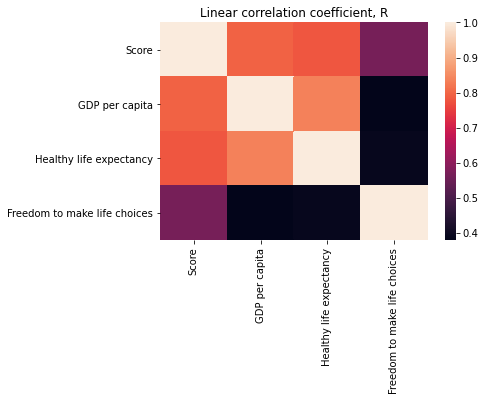

In [11]:
sb.heatmap(correlations, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values)
plt.title('Linear correlation coefficient, R')

Text(0.5, 1.0, 'Linear correlation coefficient, R')

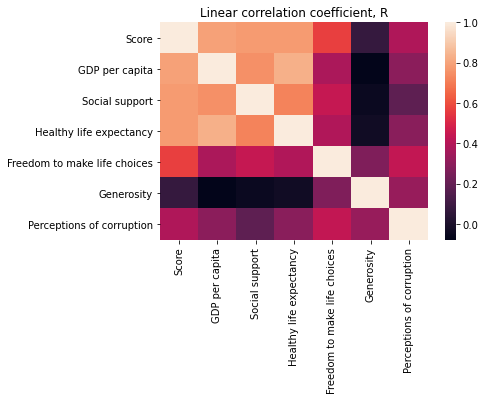

In [12]:
sb.heatmap(data.corr(), xticklabels=data.corr().columns.values, yticklabels=data.corr().columns.values)
plt.title('Linear correlation coefficient, R')

In [13]:
corr_DF = data.corr()
corr_DF

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [14]:
correlation_to_score = corr_DF['Score'][1:].sort_values(ascending=[False])
print('The top three aspects most correlated to overall happiness score are: \n 1) %s, \n 2) %s, \n 3) %s.' %(correlation_to_score.index[0],correlation_to_score.index[1],correlation_to_score.index[2]))

The top three aspects most correlated to overall happiness score are: 
 1) GDP per capita, 
 2) Healthy life expectancy, 
 3) Social support.


In [15]:
data.corr().describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.625572,0.568941,0.547440,0.570074,0.498876,0.216400,0.418157
std,0.310524,0.381154,0.371563,0.362575,0.238262,0.380102,0.268811
min,0.075824,-0.079662,-0.048126,-0.029511,0.269742,-0.079662,0.181899
25%,0.476177,0.338999,0.314616,0.342839,0.384737,-0.038819,0.297101
50%,0.777058,0.754906,0.719009,0.719009,0.438843,0.075824,0.326538
75%,0.786883,0.814672,0.765982,0.807673,0.507037,0.298140,0.412228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Interesting that a country's generosity has a slight negative, and near zero, correlation to GDP per capita, healthy life expectancy, or the relative amount of social care.

## Also has the lowest average correlation to any other metric from the study.